In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [2]:
from tensorflow.keras import datasets

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

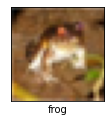

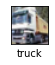

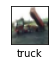

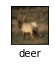

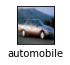

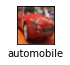

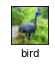

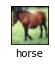

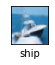

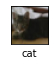

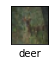

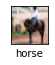

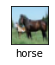

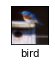

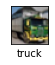

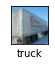

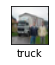

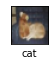

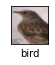

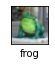

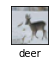

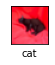

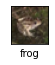

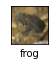

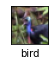

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i][0]])
  plt.show()


In [7]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
y_train.shape

(50000, 1)

In [10]:
x_test[4]

array([[[ 65,  68,  50],
        [ 70,  81,  64],
        [ 48,  64,  46],
        ...,
        [ 51,  67,  41],
        [ 54,  76,  53],
        [ 67,  87,  66]],

       [[ 69,  80,  58],
        [ 79, 102,  81],
        [ 60,  74,  57],
        ...,
        [ 54,  66,  44],
        [ 65,  90,  69],
        [ 61,  81,  66]],

       [[ 73,  95,  72],
        [ 84, 109,  87],
        [ 72,  88,  70],
        ...,
        [ 78,  98,  75],
        [ 73,  98,  77],
        [ 48,  59,  51]],

       ...,

       [[ 95, 127,  92],
        [ 91, 123,  86],
        [ 57,  79,  45],
        ...,
        [144, 172, 108],
        [170, 201, 134],
        [122, 143,  98]],

       [[ 94, 125,  82],
        [ 75, 104,  71],
        [ 32,  52,  24],
        ...,
        [143, 181, 116],
        [154, 188, 123],
        [106, 129,  89]],

       [[ 78, 102,  65],
        [ 35,  51,  27],
        [ 24,  40,  17],
        ...,
        [143, 179, 136],
        [154, 185, 146],
        [128, 156, 117]]

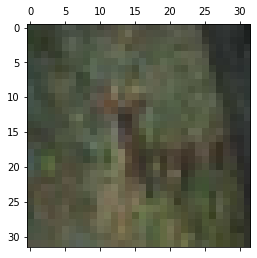

In [51]:
plt.matshow(x_train[10])

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dense,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [88]:
model = Sequential()

model.add(Conv2D(64, (3,3) , input_shape = (32,32,3),activation = 'relu'))     #Input Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))
          
model.add(Conv2D(64, (3,3) , activation='relu'))      #Hidden Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2)) 
model.add(Dropout(0.1))

model.add(Conv2D(80, (3,3) , activation='relu'))      #Hidden Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.1))  

model.add(Dense(10, activation = 'softmax'))  #Output Layer

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_12 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 batch_normalization_13 (Bat  (None, 13, 13, 64)     

In [91]:
history = model.fit(x_train , y_train , validation_split = 0.1  , epochs=30)

Epoch 1/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5150 - accuracy: 0.8196 - val_loss: 0.7341 - val_accuracy: 0.7578
Epoch 2/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5123 - accuracy: 0.8208 - val_loss: 0.6865 - val_accuracy: 0.7734
Epoch 3/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4975 - accuracy: 0.8265 - val_loss: 0.8323 - val_accuracy: 0.7334
Epoch 4/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4844 - accuracy: 0.8308 - val_loss: 0.6648 - val_accuracy: 0.7820
Epoch 5/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4854 - accuracy: 0.8313 - val_loss: 0.7072 - val_accuracy: 0.7662
Epoch 6/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4726 - accuracy: 0.8340 - val_loss: 0.8090 - val_accuracy: 0.7416
Epoch 7/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4676 - accuracy: 0.8358 - val_loss: 0.6701 - val_accuracy:

In [92]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7618 - accuracy: 0.7748


[0.7618423700332642, 0.7748000025749207]

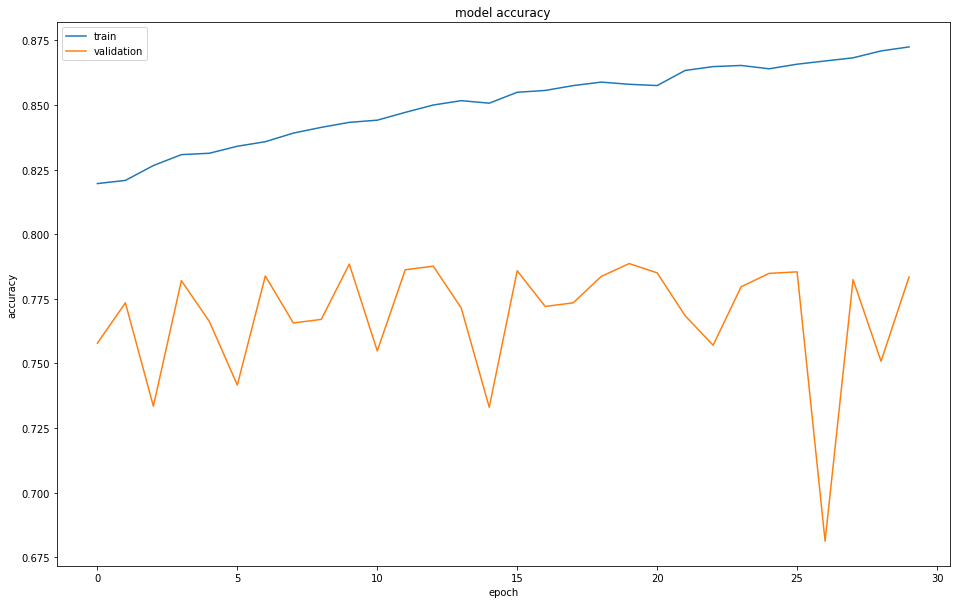

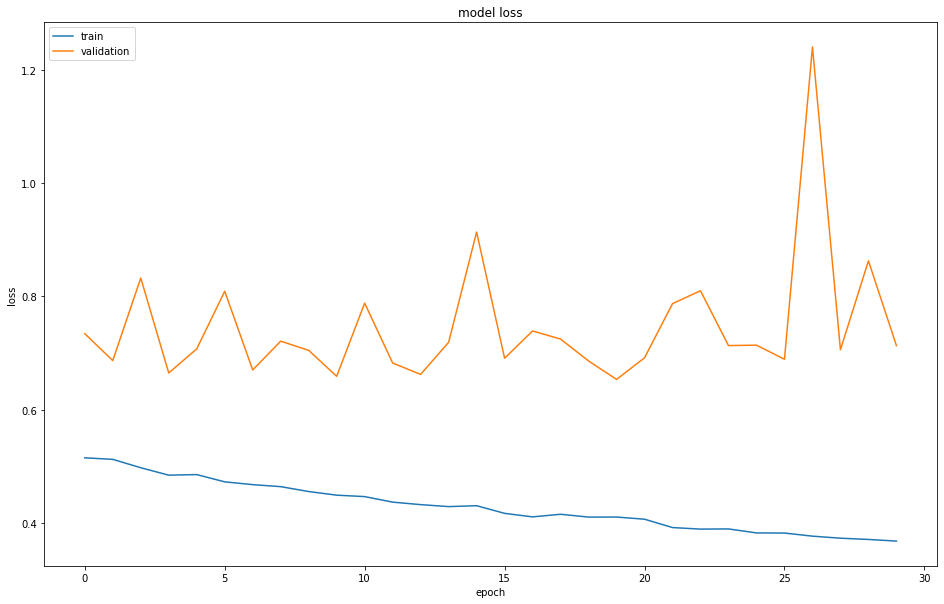

In [93]:
#  "Accuracy Plot"
plt.figure(figsize=(16,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.figure(figsize=(16,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
predictions = np.argmax(model.predict(x_test),axis = 1)
predictions

array([3, 8, 8, ..., 5, 1, 7])

In [95]:
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report
cm=confusion_matrix(y_test,predictions)
print(cm)
print(accuracy_score(y_test,predictions))

[[771   4  32  10  18   2   5  15  98  45]
 [  8 795   7   7   3   3   6   3  35 133]
 [ 57   2 666  45  77  45  39  30  23  16]
 [ 14   2  47 590  69 111  50  57  32  28]
 [ 13   0  45  35 750  24  16  94  15   8]
 [ 11   1  52 132  38 648  19  75   9  15]
 [  7   1  45  42  33  14 827  12   9  10]
 [  8   0  22  23  26  25   1 865   7  23]
 [ 31   7   7   3   1   2   1   3 913  32]
 [ 11  14   6   4   2   1   2   7  30 923]]
0.7748


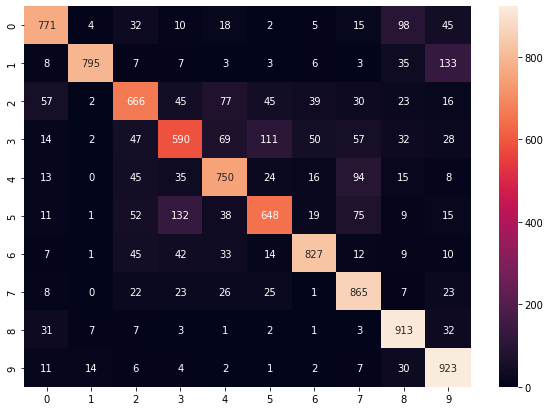

In [96]:
fig = plt.figure(figsize=(10,7))
confusion_matrix = cm
sns.heatmap(confusion_matrix,annot = True,fmt = 'd')

In [97]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       931
           1       0.80      0.96      0.87       826
           2       0.67      0.72      0.69       929
           3       0.59      0.66      0.62       891
           4       0.75      0.74      0.74      1017
           5       0.65      0.74      0.69       875
           6       0.83      0.86      0.84       966
           7       0.86      0.75      0.80      1161
           8       0.91      0.78      0.84      1171
           9       0.92      0.75      0.83      1233

    accuracy                           0.77     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.79      0.77      0.78     10000

